# **1. Import Library**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, precision_recall_curve, confusion_matrix, classification_report, roc_auc_score, auc
)
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# **2. Load Dataset**

In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# **3. Exploratory Data Analysis (EDA)**

In [6]:
# Make a function to get summary of each dataset
def getDatainfo(df):
    n_rows, n_cols = df.shape

    column_info = df.dtypes.reset_index()
    column_info.columns = ['Column Name', 'Data Type']

    non_null_count = df.count().reset_index()
    non_null_count.columns = ['Column Name', 'Non Null Count']

    null_count = df.isnull().sum().reset_index()
    null_count.columns = ['Column Name', 'NaN Count']

    duplicated_count = df.duplicated().sum()

    unique_count = df.nunique().reset_index()
    unique_count.columns = ['Column Name', 'Unique Count']

    data_info = pd.merge(column_info, unique_count, on='Column Name')
    data_info = pd.merge(data_info, non_null_count, on='Column Name')
    data_info = pd.merge(data_info, null_count, on='Column Name')

    data_info['NaN Percentage (%)'] = round((data_info['NaN Count'] / n_rows) * 100, 2).apply(lambda x:f'{x:.2f}%')
    data_info['Duplicated Count'] = duplicated_count
    data_info['Total Count'] = n_rows

    return data_info

In [7]:
print('The summary information of train dataset: ')
getDatainfo(train_df)

The summary information of train dataset: 


,Column Name,Data Type,Unique Count,Non Null Count,NaN Count,NaN Percentage (%),Duplicated Count,Total Count
0,PassengerId,int64,891,891,0,0.00%,0,891
1,Survived,int64,2,891,0,0.00%,0,891
2,Pclass,int64,3,891,0,0.00%,0,891
3,Name,object,891,891,0,0.00%,0,891
4,Sex,object,2,891,0,0.00%,0,891
5,Age,float64,88,714,177,19.87%,0,891
6,SibSp,int64,7,891,0,0.00%,0,891
7,Parch,int64,7,891,0,0.00%,0,891
8,Ticket,object,681,891,0,0.00%,0,891
9,Fare,float64,248,891,0,0.00%,0,891


In [8]:
print('The summary information of test dataset: ')
getDatainfo(test_df)

The summary information of test dataset: 


,Column Name,Data Type,Unique Count,Non Null Count,NaN Count,NaN Percentage (%),Duplicated Count,Total Count
0,PassengerId,int64,418,418,0,0.00%,0,418
1,Pclass,int64,3,418,0,0.00%,0,418
2,Name,object,418,418,0,0.00%,0,418
3,Sex,object,2,418,0,0.00%,0,418
4,Age,float64,79,332,86,20.57%,0,418
5,SibSp,int64,7,418,0,0.00%,0,418
6,Parch,int64,8,418,0,0.00%,0,418
7,Ticket,object,363,418,0,0.00%,0,418
8,Fare,float64,169,417,1,0.24%,0,418
9,Cabin,object,76,91,327,78.23%,0,418


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,G6,4
Embarked,889,3,S,644


- **Visualization**

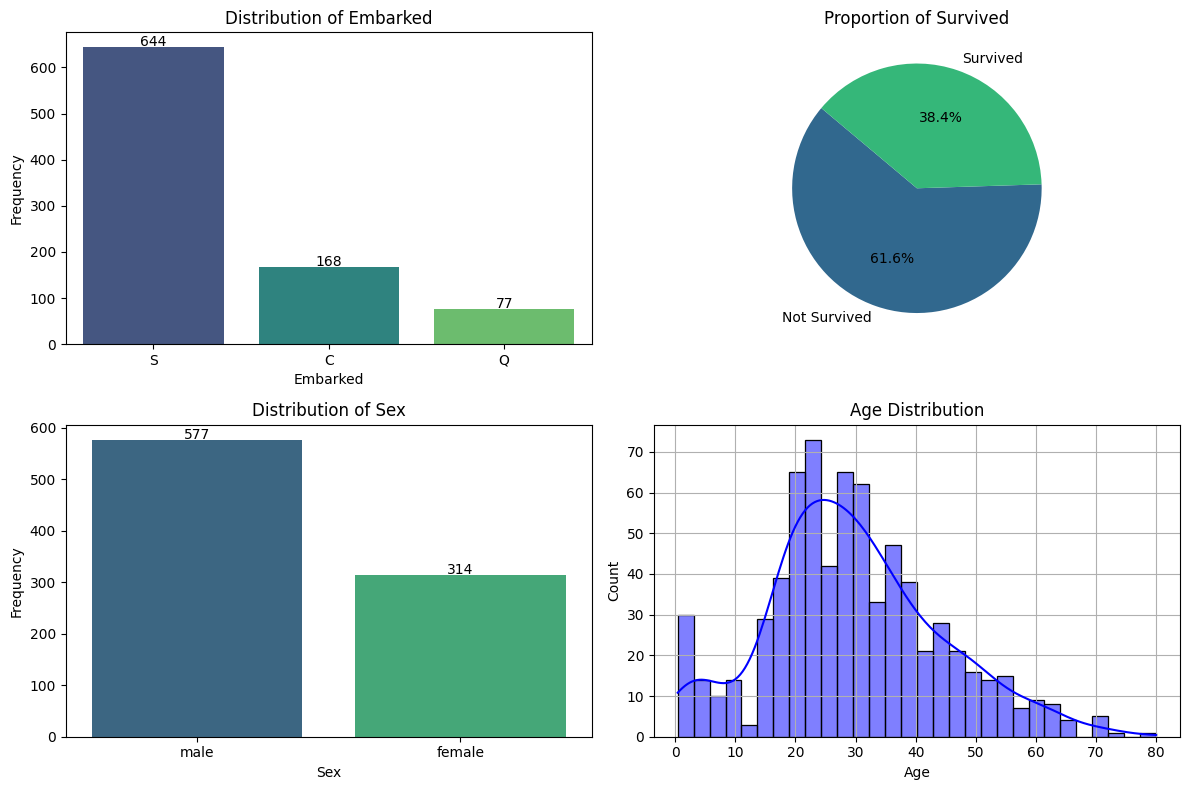

In [11]:
features = ['Embarked', 'Survived', 'Sex', 'Age']

plt.figure(figsize=(12, 8))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)

    if col == 'Survived':
        survived_count = train_df[col].value_counts().sort_index()
        labels = ['Not Survived', 'Survived']
        plt.pie(
            survived_count,
            labels=labels,
            autopct='%1.1f%%',
            startangle=140,
            colors=sns.color_palette('viridis', n_colors=2)
        )
        plt.title('Proportion of Survived')

    elif col == 'Age':
        sns.histplot(train_df['Age'], kde=True, bins=30, color='blue')
        plt.title('Age Distribution')
        plt.grid(True)

    else:
        order = train_df[col].value_counts().index
        ax = sns.countplot(data=train_df, x=col, order=order, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Frequency')
        plt.xlabel(col)

        # Tambahkan label jumlah
        for p in ax.patches:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2,
                height + 2,
                f'{int(height)}',
                ha='center',
                fontsize=10
            )

plt.tight_layout()
plt.show()

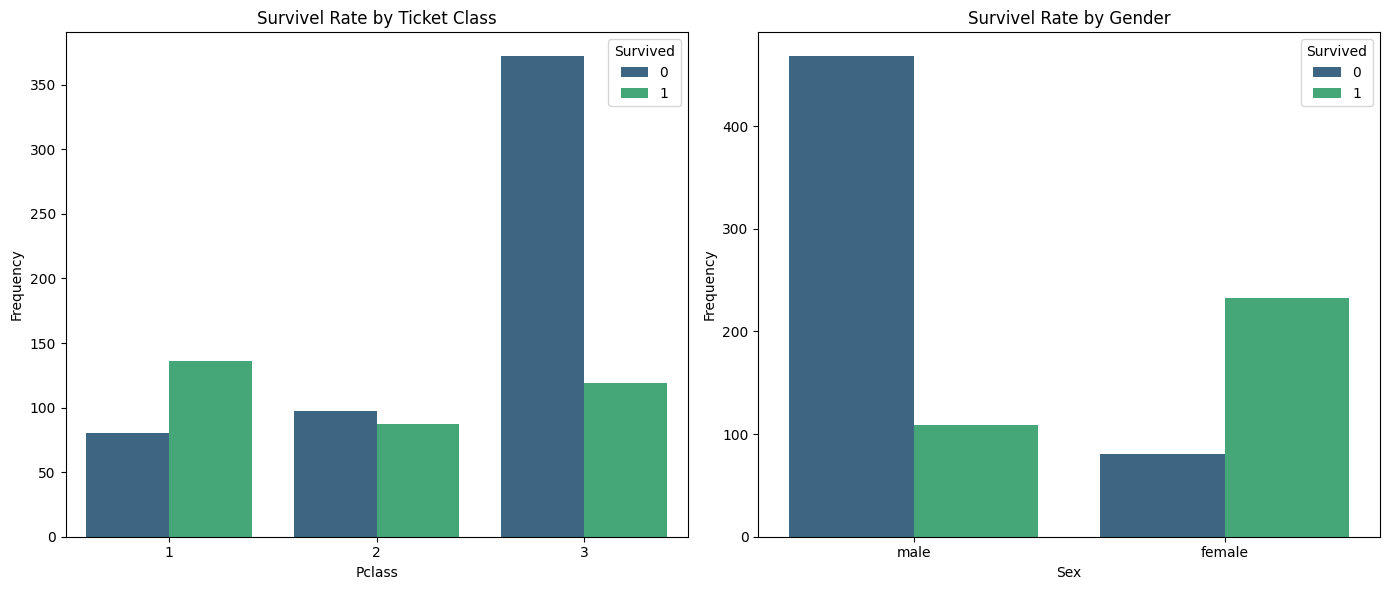

In [12]:
# Survivel Rate by Ticket Class
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survivel Rate by Ticket Class')
plt.ylabel('Frequency')

# Survivel Rate by Gender
plt.subplot(1, 2, 2)
sns.countplot(data=train_df, x='Sex', hue='Survived', palette='viridis')
plt.title('Survivel Rate by Gender')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# **4. Data Preprocessing**

In [13]:
# Handling missing value 'Age' in train_df and test_df
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

# Drop missing value in train_df and test_df
train_df = train_df.dropna(subset=['Embarked'])
test_df = test_df.dropna(subset=['Embarked', 'Fare'])

In [14]:
# Drop Columns that will not be used
train_df.drop(columns=['PassengerId','Name', 'Ticket','Cabin'], axis=1, inplace=True)
test_df.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

*Feature Engineering*

In [15]:
# Make a new column
def age_grouping(age):
  if age <= 4:
    return 'Infant'
  elif age <= 12:
    return 'Child'
  elif age <= 19:
    return 'Teenager'
  elif age <= 35:
    return 'Young Adult'
  elif age <= 60:
    return 'Adult'
  else:
    return 'Elderly'

train_df['Age Grouping'] = train_df['Age'].apply(age_grouping)
test_df['Age Grouping'] = test_df['Age'].apply(age_grouping)

In [16]:
# Normalize the data
scaler = StandardScaler()
scaler_features = ['Fare']
train_df[scaler_features] = scaler.fit_transform(train_df[scaler_features])
test_df[scaler_features] = scaler.fit_transform(test_df[scaler_features])

In [17]:
# Encoding categorical features
encoder = LabelEncoder()
encoding_features = ['Sex', 'Embarked', 'Age Grouping']
for col in encoding_features:
  train_df[col] = encoder.fit_transform(train_df[col])
  test_df[col] = encoder.fit_transform(test_df[col])

In [18]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Grouping
0,0,3,1,22.0,1,0,-0.500240,2,5
1,1,1,0,38.0,1,0,0.788947,0,0
2,1,3,0,26.0,0,0,-0.486650,2,5
3,1,1,0,35.0,1,0,0.422861,2,5
4,0,3,1,35.0,0,0,-0.484133,2,5


In [19]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Grouping
0,892,3,1,34.5,0,0,-0.497811,1,5
1,893,3,0,47.0,1,0,-0.512660,2,0
2,894,2,1,62.0,0,0,-0.464532,1,2
3,895,3,1,27.0,0,0,-0.482888,2,5
4,896,3,0,22.0,1,1,-0.417971,2,5


# **5. Data Splitting**

In [28]:
# Inizialization variable X and y
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape[0])
print(X_test.shape[0])

711
178


# **6. Model Training**

In [21]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=6, random_state=42)
}
# Train models
for name, model in models.items():
    model.fit(X_train, y_train)

print('Data completed training')

Data completed training


# **7. Evaluate Model**

In [22]:
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = []

    for name, model in models.items():
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cv = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

        results.append({
            'Model': name,
            'Accuracy': acc,
            'Recall': rec,
            'Precision': prec,
            'F1 Score': f1,
            'CV Score': cv,
        })

    df = pd.DataFrame(results)
    df.update(df.drop(columns='Model').applymap(lambda x: f'{x*100:.2f}'))

    return df.sort_values(by='Accuracy', ascending=False)

In [23]:
results_df = evaluate_models(models, X_train, y_train, X_test, y_test)
print(results_df)

                 Model Accuracy Recall Precision F1 Score CV Score
2        Decision Tree    81.46  72.46     78.12    75.19    79.89
0  Logistic Regression    79.78  78.26     72.00    75.00    79.46
1        Random Forest    78.65  72.46     72.46    72.46    83.27


In [24]:
def plot_confusion_matrices(models, X_test, y_test):
    plt.figure(figsize=(20, 12))

    for i, (name, model) in enumerate(models.items(), 1):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        plt.subplot(2, 3, i)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=sorted(set(y_test)),
                    yticklabels=sorted(set(y_test)))
        plt.title(f'Confusion Matrix - {name}', fontsize=15)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()

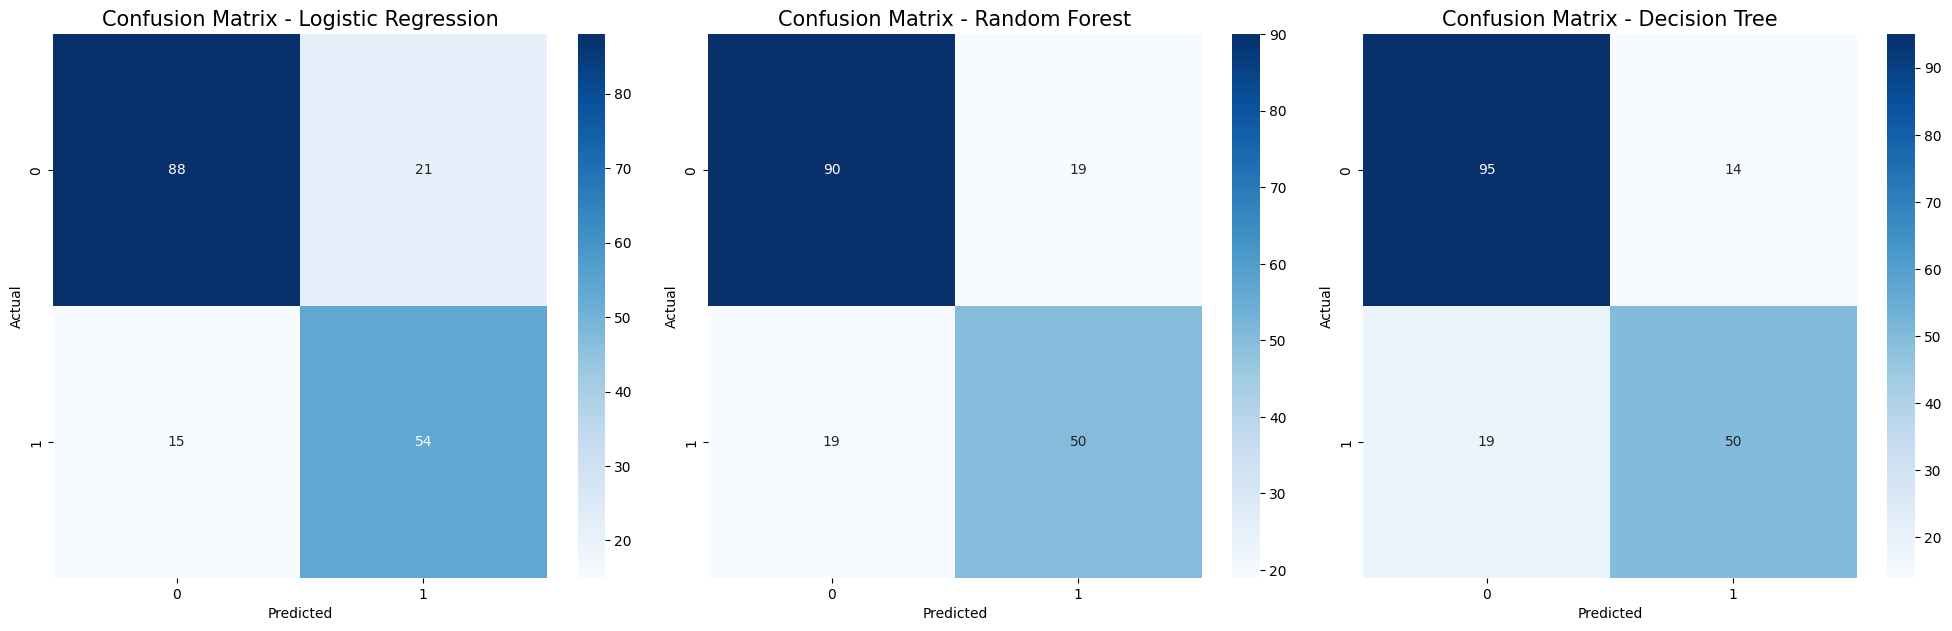

In [25]:
# Plot Confusion Matrix
plot_confusion_matrices(models, X_test, y_test)

In [26]:
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Models')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

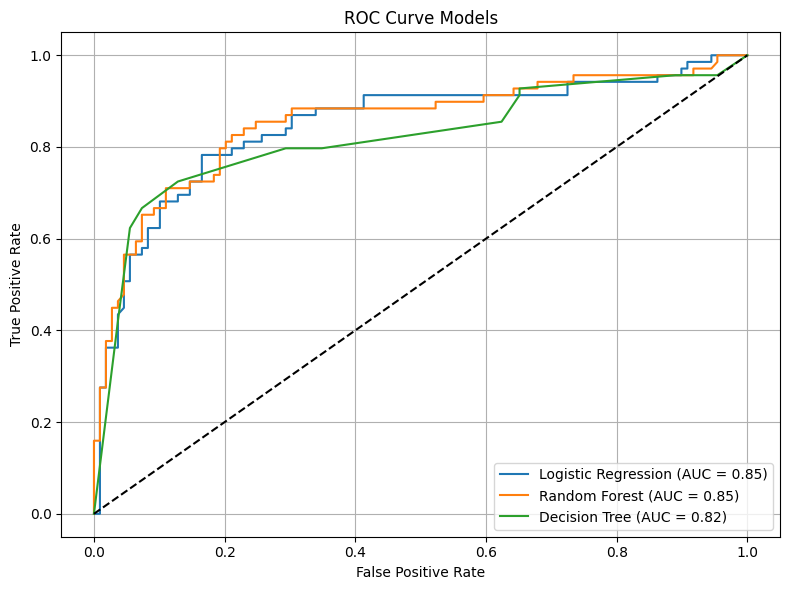

In [27]:
# Plot ROC Curve
plot_roc_curves(models, X_test, y_test)